In [ ]:
matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import plot_temperature as p_info

def chaleur2D_exp(Nx,Ny,cfl):

    plt.close("all")

    L = 1
    nu = 1
    T = 0.01

    hx = L / Nx
    hy = L / Ny
    Ncell = Nx * Ny

    if cfl == 0:
        Nt = int(input('Nombre de pas de temps : '))
        deltat = T / Nt
        Nt2 = Nt
    else:
        deltat = cfl * (hx ** 2 * hy ** 2) / (nu * (hx ** 2 + hy ** 2))
        Nt = int(np.floor(T / deltat))
        if Nt * deltat != T:
            Nt2 = Nt + 1
        else:
            Nt2 = Nt
            
    #print(f"Le nombre de pas de temps est {Nt2}")

    lambdax = nu * deltat / hx ** 2
    lambday = nu * deltat / hy ** 2

    x = np.linspace(0, L, Nx + 1)
    y = np.linspace(0, L, Ny + 1)
    t = np.linspace(0, T, Nt2 + 1)

    u = np.zeros((Nx + 1, Ny + 1))
    uold = np.zeros((Nx + 1, Ny + 1))
    uini = np.zeros((Nx + 1, Ny + 1))
    for i in range(Nx + 1):
        if 0.4 <= x[i] <= 0.6:
            for j in range(Ny + 1):
                if 0.4 <= y[j] <= 0.6:
                    u[i, j] = 1
    
    uold[:]=u[:]
    uini[:]=u[:]
    
    X, Y = np.meshgrid(x, y)

    p_info.plot_info_init(X, Y, uini, np.min(uini), np.max(uini))

    for n in range(1, Nt2 + 1):
        for i in range(1, Nx):
            for j in range(1, Ny):
                u[i, j] = (1 - 2 * (lambdax + lambday)) * uold[i, j] + \
                           lambdax * (uold[i + 1, j] + uold[i - 1, j]) + \
                           lambday * (uold[i, j + 1] + uold[i, j - 1])
        uold[:]=u[:]

    minnn = np.min(uini[:, :])
    maxxx = np.max(uini[:, :])
    minu = np.min(u[:, :])
    maxu = np.max(u[:, :])

    minnn = min(minnn, minu)
    maxxx = max(maxxx, maxu)

    p_info.plot_info_fin(X, Y, u[:], minnn, maxxx)




ModuleNotFoundError: No module named 'plot_temperature'

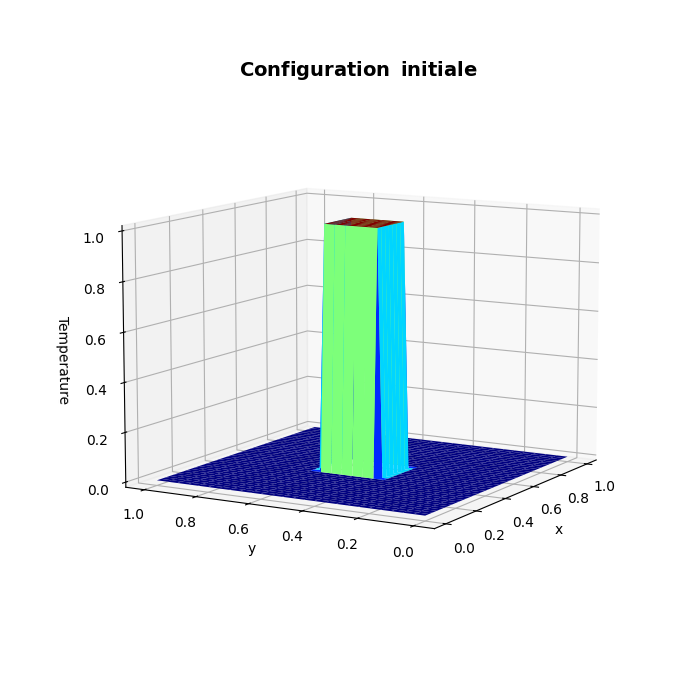

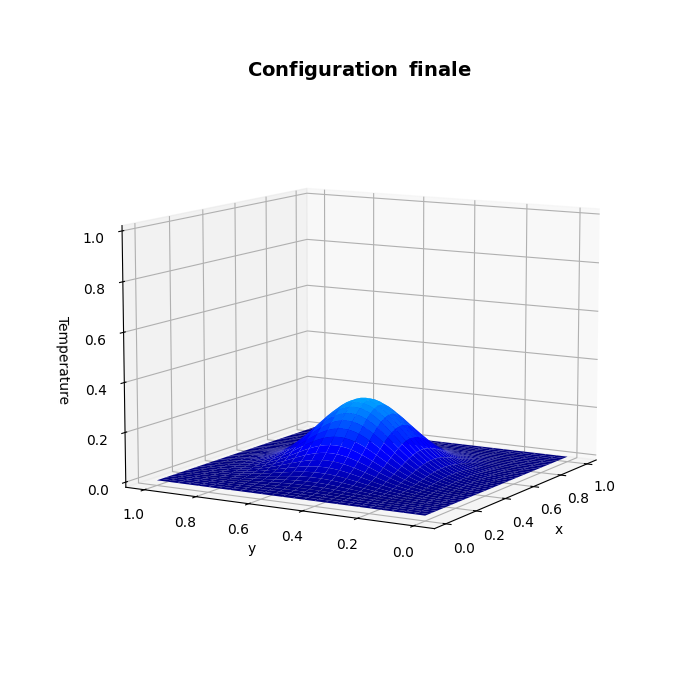

                       La température minimum est de 0.00°C                               
                       La température maximum est de 0.29°C                               
                       La température moyenne est de 0.04°C                               
                       L'écart type des températures est de 0.07°C                        
 


In [ ]:
chaleur2D_exp(40,50,0.45)

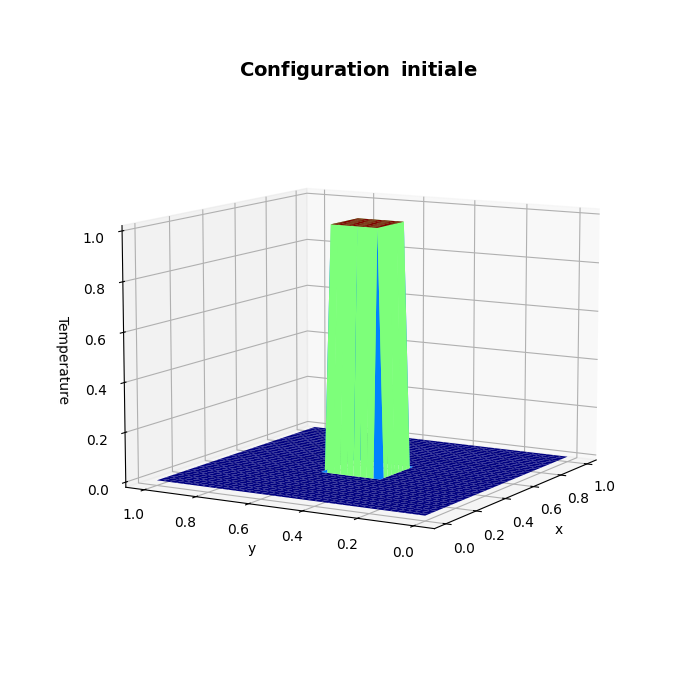

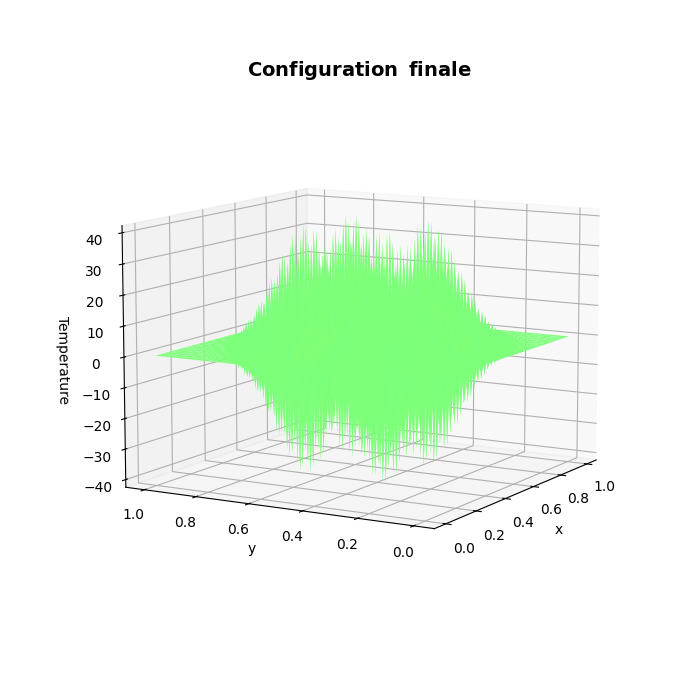

                        La température minimum est de -40.84°C                              
                        La température maximum est de 40.60°C                               
                        La température moyenne est de 0.04°C                                
                        L'écart type des températures est de 13.90°C                        
 


In [ ]:
chaleur2D_exp(40,40,0.55)

Ces résultats corroborent l'analyse de stabilité : le coefficient CFL doit rester $\leq$ 0.5, le schéma étant seulement conditionnellement stable (schéma explicite en temps)